In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
import gc
gc.collect()

0

# Analisis Exploratorio de Datos - Taxis

Este documento contiene el analisis exploratorio de datos del archivo taxis.parquet que corresponde a la informacion de los viajes realizados en la ciudad de Nueva York para el periodo de Septiembre 2023 a Agosto 2024. Se incluyó la información de taxis amarillos y verdes (viajes dentro y fuera del area del centro de Manhattan)

## Carga de datos

In [2]:
taxis = pd.read_parquet('taxis.parquet')

## Tabla de Contenido

1. Descripcion General <br>
2. Manejo de Nulos y Vacios<br>
2. Manejo de Duplicados<br>
4. Analisis de Variables<br>
   4.1. Variable tipo 'datetime'<br>
   4.2. Variables categóricas<br>
   4.3. Variables cuantitativas <br>
5. Analisis de Outliers<br>
6. Analisis de Correlación <br>

## Descripcion General

Tenemos un dataset que consta de 40.176.771 de registros y 22 columnas. El DataFrame tiene 4 tipos de datos que se dividen de la siguiente manera:
- **datetime:** *tpep_pickup_datetime*, *tpep_dropoff_datetime*
- **float:** *passenger_count*, *trip_distance*, *RatecodeID*, *payment_type*, *fare_amount*, *extra*, *mta_tax*, *tip_amount*, *tolls_amount*, *improvement_surcharge*, *total_amount*, *congestion_surcharge*, *Airport_fee*, *ehail_fee*, *trip_type*
- **int:** *VendorID*, *PULocationID*, *DOLocationID*
- **object:** *store_and_fwd_flag*, *type*


In [4]:
taxis

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,type,ehail_fee,trip_type
0,1,2023-09-01 00:15:37,2023-09-01 00:20:21,1.0,0.80,1.0,N,163,230,2.0,...,0.5,0.00,0.0,1.0,11.50,2.5,0.00,yellow,NaN,NaN
1,2,2023-09-01 00:18:40,2023-09-01 00:30:28,2.0,2.34,1.0,N,236,233,1.0,...,0.5,2.00,0.0,1.0,21.20,2.5,0.00,yellow,NaN,NaN
2,2,2023-09-01 00:35:01,2023-09-01 00:39:04,1.0,1.62,1.0,N,162,236,1.0,...,0.5,2.00,0.0,1.0,15.60,2.5,0.00,yellow,NaN,NaN
3,2,2023-09-01 00:45:45,2023-09-01 00:47:37,1.0,0.74,1.0,N,141,229,1.0,...,0.5,1.00,0.0,1.0,11.10,2.5,0.00,yellow,NaN,NaN
4,2,2023-09-01 00:01:23,2023-09-01 00:38:05,1.0,9.85,1.0,N,138,230,1.0,...,0.5,17.02,0.0,1.0,73.77,2.5,1.75,yellow,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40176766,2,2024-08-31 20:58:00,2024-08-31 21:25:00,NaN,13.50,NaN,None,223,132,NaN,...,0.0,10.03,0.0,1.0,60.67,NaN,NaN,green,NaN,NaN
40176767,2,2024-08-31 21:39:00,2024-08-31 21:56:00,NaN,1.78,NaN,None,129,7,NaN,...,0.0,3.00,0.0,1.0,21.86,NaN,NaN,green,NaN,NaN
40176768,2,2024-08-31 22:59:00,2024-08-31 23:19:00,NaN,3.27,NaN,None,255,65,NaN,...,0.0,4.89,0.0,1.0,29.84,NaN,NaN,green,NaN,NaN
40176769,2,2024-08-31 22:26:00,2024-08-31 22:42:00,NaN,2.50,NaN,None,244,41,NaN,...,0.0,0.00,0.0,1.0,21.09,NaN,NaN,green,NaN,NaN


In [ ]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40176771 entries, 0 to 40176770
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           float64       
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee         

## Manejo de nulos y vacios

Al realizar el análisis de valores nulos en el dataframe se obtuvó que existe en total 96.178.938 valores nulos entre todas las filas y columnas, distribuidos en las siguientes columnas:
- __*passenger_count*, *RatecodeID*, *store_and_fwd_flag*, *congestion_surcharge*:__ 3.157.799 registros con valores nulos en estos 4 campos a la vez.
- __*payment_type*:__ 36.326 registros con este campo en nulo.
- __*Airport_fee*:__ 3.824.776 registros con valor nulo que corresponden a los mismos 3.157.799 registros mencionados en el primer item y viajes en taxi de *type* 'green' que no contenian esta columna originalmente. 
- __*ehail_fee*:__ Todos los valores son nulos. Adicionalmente, se encontró que esta columna no existe en los diccionarios de datos correspondientes a estos datasets.
- __*trip_type*:__ Todos los registros de viajese+ en taxi de *type* yellow que no contenian esta columna.

In [9]:
taxis.isnull().sum().sum()

np.int64(96178938)

In [6]:
taxis.isnull().sum()

VendorID                        0
tpep_pickup_datetime            0
tpep_dropoff_datetime           0
passenger_count           3157799
trip_distance                   0
RatecodeID                3157799
store_and_fwd_flag        3157799
PULocationID                    0
DOLocationID                    0
payment_type                36326
fare_amount                     0
extra                           0
mta_tax                         0
tip_amount                      0
tolls_amount                    0
improvement_surcharge           0
total_amount                    0
congestion_surcharge      3157799
Airport_fee               3824776
type                            0
ehail_fee                40176771
trip_type                39509869
dtype: int64

In [11]:
taxis[(taxis['passenger_count'].isnull())
      &(taxis['RatecodeID'].isnull())
      &(taxis['store_and_fwd_flag'].isnull())
      &(taxis['congestion_surcharge'].isnull())
      &(taxis['Airport_fee'].isnull())]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,type,ehail_fee,trip_type
2706497,1,2023-09-01 00:40:49,2023-09-01 00:46:57,NaN,1.20,NaN,None,249,164,0.0,...,0.5,1.94,0.0,1.0,14.84,NaN,NaN,yellow,NaN,NaN
2706498,2,2023-09-01 00:11:15,2023-09-01 00:51:28,NaN,8.48,NaN,None,125,188,0.0,...,0.5,0.00,0.0,1.0,32.59,NaN,NaN,yellow,NaN,NaN
2706499,1,2023-09-01 00:02:50,2023-09-01 00:20:12,NaN,0.00,NaN,None,255,79,0.0,...,0.5,0.00,0.0,1.0,23.09,NaN,NaN,yellow,NaN,NaN
2706500,1,2023-09-01 00:09:54,2023-09-01 00:20:11,NaN,2.10,NaN,None,263,142,0.0,...,0.5,0.82,0.0,1.0,17.22,NaN,NaN,yellow,NaN,NaN
2706501,2,2023-09-01 00:15:58,2023-09-01 00:32:10,NaN,3.12,NaN,None,146,48,0.0,...,0.5,3.23,0.0,1.0,24.76,NaN,NaN,yellow,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40176766,2,2024-08-31 20:58:00,2024-08-31 21:25:00,NaN,13.50,NaN,None,223,132,NaN,...,0.0,10.03,0.0,1.0,60.67,NaN,NaN,green,NaN,NaN
40176767,2,2024-08-31 21:39:00,2024-08-31 21:56:00,NaN,1.78,NaN,None,129,7,NaN,...,0.0,3.00,0.0,1.0,21.86,NaN,NaN,green,NaN,NaN
40176768,2,2024-08-31 22:59:00,2024-08-31 23:19:00,NaN,3.27,NaN,None,255,65,NaN,...,0.0,4.89,0.0,1.0,29.84,NaN,NaN,green,NaN,NaN
40176769,2,2024-08-31 22:26:00,2024-08-31 22:42:00,NaN,2.50,NaN,None,244,41,NaN,...,0.0,0.00,0.0,1.0,21.09,NaN,NaN,green,NaN,NaN


## Manejo de duplicados

Se encontraron 4 registros duplicados en todos los campos del dataframe.

In [8]:
taxis[taxis.duplicated()]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,type,ehail_fee,trip_type
7782336,2,2023-11-13 13:26:12,2023-11-13 14:48:41,1.0,18.87,2.0,N,230,132,1.0,...,0.5,16.19,6.94,1.0,97.13,2.5,0.0,yellow,NaN,NaN
7801579,2,2023-11-13 13:57:30,2023-11-13 14:54:16,1.0,18.02,2.0,N,10,239,2.0,...,0.5,0.00,6.94,1.0,85.94,2.5,0.0,yellow,NaN,NaN
16804165,2,2024-02-08 18:23:50,2024-02-08 18:38:14,1.0,0.81,1.0,N,162,230,1.0,...,0.5,3.86,0.00,1.0,23.16,2.5,0.0,yellow,NaN,NaN
34814150,1,2024-07-17 11:23:28,2024-07-17 11:23:35,1.0,0.00,1.0,N,145,145,2.0,...,0.5,0.00,0.00,1.0,4.50,0.0,0.0,yellow,NaN,NaN


## Analisis de Variables

Para el analisis preliminar se dividieron las variables en 3 grupos: tipo *'datetime'*, categoricas y numericas. Debido a que la columna *ehail_fee* contiene solo valores nulos y esta contenida en el diccionario de dato, esta no fue incluida en el analisis. A continuacion se presentan los graficos y primeras impresiones de estos datos.

### Variables tipo *'datetime'*

En esta seccion se realizara en analisis preliminar de los campos correspondientes a la hora y fecha de los inicios y finilizaciones de los viajes (*tpep_pickup_datetime* y *tpep_dropoff_datetime*). Para esto se extrajo la informacion de mes, hora y dia de la semana, al igual que el calculo de la duracion del viaje en minutos.

In [3]:
import locale
locale.setlocale(locale.LC_TIME, 'Spanish_Spain.1252') 

'Spanish_Spain.1252'

In [4]:
df_time = taxis[['tpep_pickup_datetime','tpep_dropoff_datetime']]

In [123]:
df_time[~(df_time['tpep_dropoff_datetime'].dt.year == df_time['tpep_pickup_datetime'].dt.year)]

,tpep_pickup_datetime,tpep_dropoff_datetime
3306060,2008-12-31 23:03:12,2009-01-01 13:50:40
3394872,2023-10-06 07:15:00,1970-01-20 10:16:32
4471184,2008-12-31 23:06:48,2009-01-01 12:05:09
6155412,2008-12-31 23:04:45,2009-01-01 14:58:14
10837481,2002-12-31 22:16:54,2003-01-01 15:02:08
...,...,...
39728249,2023-12-31 15:20:25,2024-01-01 14:34:34
39728386,2023-12-31 23:59:19,2024-01-01 00:01:13
39728409,2023-12-31 23:51:55,2024-01-01 00:11:05
39728417,2023-12-31 23:57:58,2024-01-01 00:00:10


In [5]:
df_time['month'] = df_time['tpep_pickup_datetime'].dt.strftime('%B').str.upper()

C:\Users\Carolina\AppData\Local\Temp\ipykernel_18928\2027181767.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['month'] = df_time['tpep_pickup_datetime'].dt.strftime('%B').str.upper()


In [6]:
df_time['weekday'] = df_time['tpep_pickup_datetime'].dt.strftime('%A').str.upper()

C:\Users\Carolina\AppData\Local\Temp\ipykernel_18928\41542051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['weekday'] = df_time['tpep_pickup_datetime'].dt.strftime('%A').str.upper()


In [7]:
df_time['hour'] = df_time['tpep_pickup_datetime'].dt.hour

C:\Users\Carolina\AppData\Local\Temp\ipykernel_18928\2920198995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['hour'] = df_time['tpep_pickup_datetime'].dt.hour


In [8]:
df_time['duration'] = df_time['tpep_dropoff_datetime'] - df_time['tpep_pickup_datetime']
df_time['duration'] = df_time['duration'].dt.total_seconds() / 60

C:\Users\Carolina\AppData\Local\Temp\ipykernel_18928\2835337474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['duration'] = df_time['tpep_dropoff_datetime'] - df_time['tpep_pickup_datetime']
C:\Users\Carolina\AppData\Local\Temp\ipykernel_18928\2835337474.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['duration'] = df_time['duration'].dt.total_seconds() / 60


In [58]:
df_time

,tpep_pickup_datetime,tpep_dropoff_datetime,month,weekday,hour,duration
0,2023-09-01 00:15:37,2023-09-01 00:20:21,SEPTIEMBRE,VIERNES,0,4.733333
1,2023-09-01 00:18:40,2023-09-01 00:30:28,SEPTIEMBRE,VIERNES,0,11.800000
2,2023-09-01 00:35:01,2023-09-01 00:39:04,SEPTIEMBRE,VIERNES,0,4.050000
3,2023-09-01 00:45:45,2023-09-01 00:47:37,SEPTIEMBRE,VIERNES,0,1.866667
4,2023-09-01 00:01:23,2023-09-01 00:38:05,SEPTIEMBRE,VIERNES,0,36.700000
...,...,...,...,...,...,...
40176766,2024-08-31 20:58:00,2024-08-31 21:25:00,AGOSTO,SÁBADO,20,27.000000
40176767,2024-08-31 21:39:00,2024-08-31 21:56:00,AGOSTO,SÁBADO,21,17.000000
40176768,2024-08-31 22:59:00,2024-08-31 23:19:00,AGOSTO,SÁBADO,22,20.000000
40176769,2024-08-31 22:26:00,2024-08-31 22:42:00,AGOSTO,SÁBADO,22,16.000000


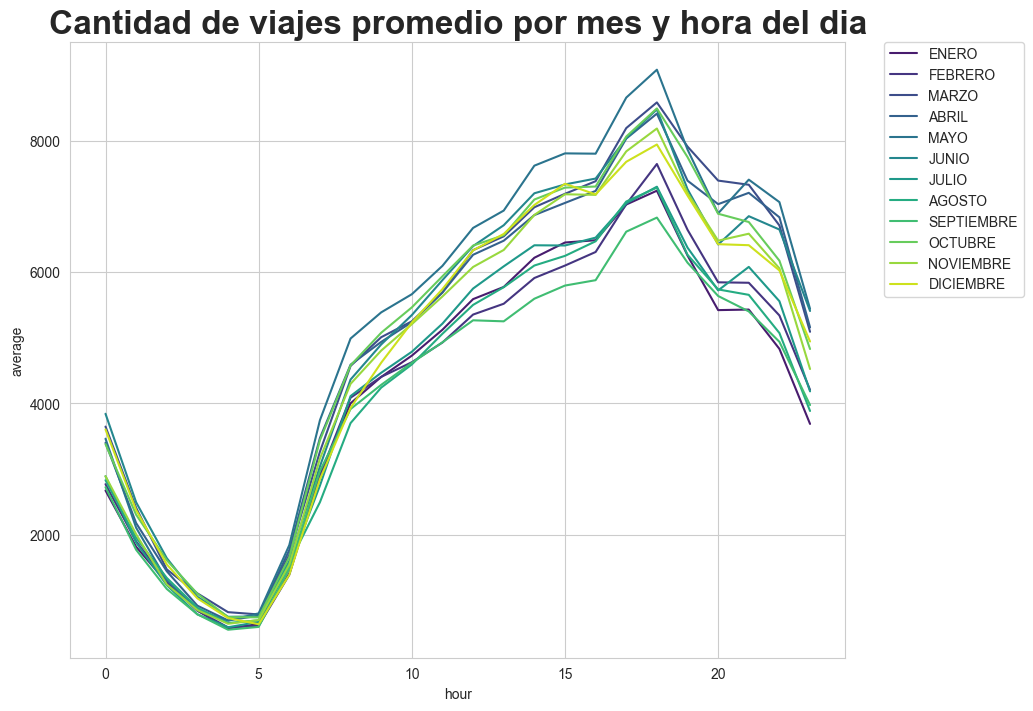

In [40]:
sns.set_style("whitegrid")
d = df_time.groupby(['month','hour']).size().reset_index(name='count')
d['average'] = d['count']/30
plt.figure(figsize=(10,8))
sns.lineplot(data=d, x="hour", y="average", hue="month",
              hue_order=['ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO', 'JULIO', 'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'DICIEMBRE'], palette='viridis')
plt.title('Cantidad de viajes promedio por mes y hora del dia', fontsize=24, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

C:\Users\Carolina\AppData\Local\Temp\ipykernel_7468\3370742915.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_time.groupby('month').size().reset_index(name='count'), x='month', y='count', order=['ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO',


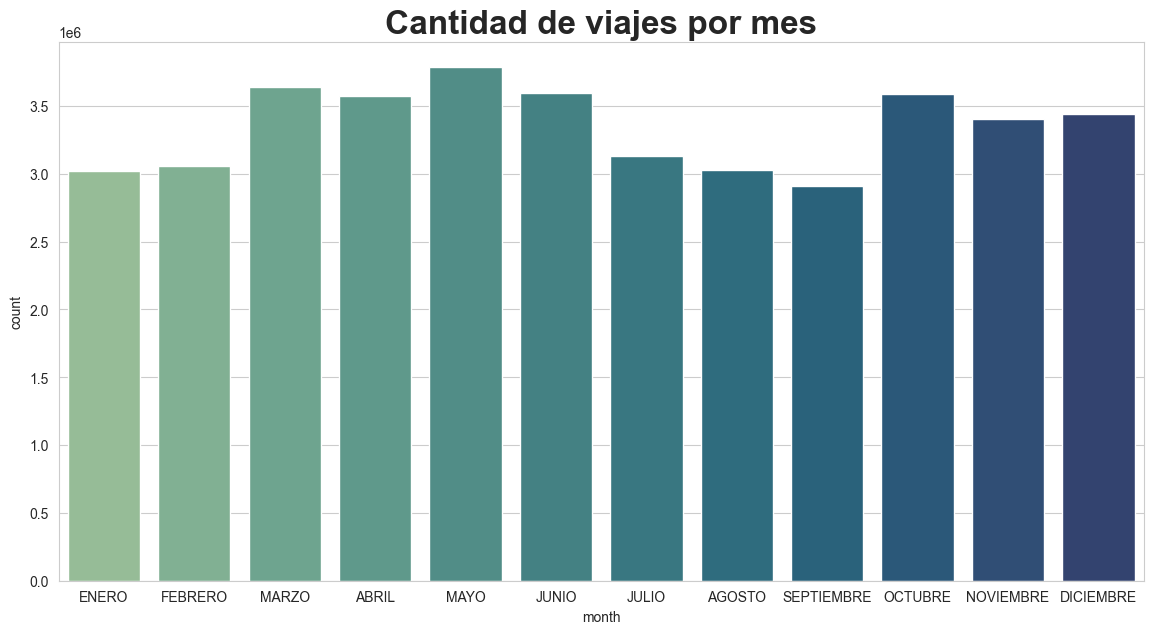

In [50]:
sns.set_style("whitegrid")
plt.figure(figsize=(14, 7))
sns.barplot(data=df_time.groupby('month').size().reset_index(name='count'), x='month', y='count', order=['ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO', 
               'JULIO', 'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'DICIEMBRE'], palette='crest')
plt.title('Cantidad de viajes por mes', fontsize=24, fontweight='bold')
plt.show()

#### Histograma

In [18]:
df_time['duration'].describe().apply(lambda x: '{:,.2f}'.format(x)).to_frame()

,duration
count,"40,176,771.00"
mean,16.76
std,"4,456.77"
min,"-28,248,298.47"
25%,7.75
50%,12.85
75%,20.92
max,"9,767.52"


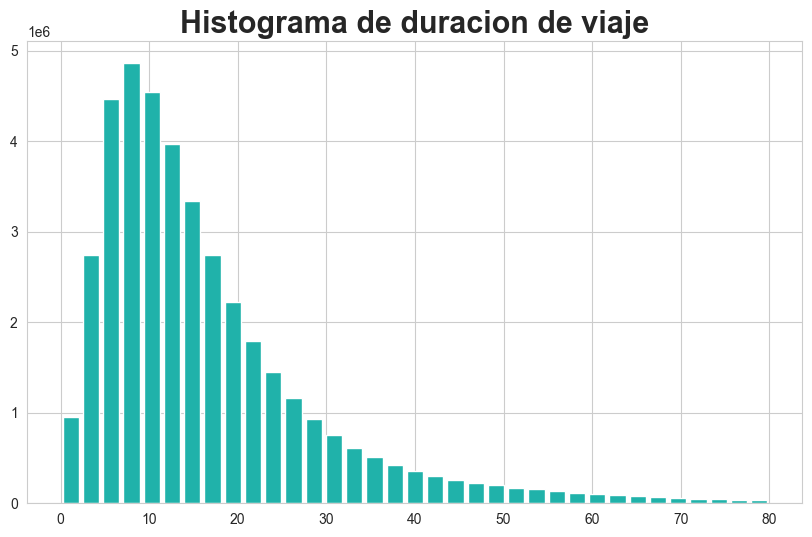

In [45]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
plt.hist(df_time[(df_time['duration']>0)&(df_time['duration']<80)]['duration'], bins=35, rwidth=0.8, color='lightseagreen')
plt.title('Histograma de duracion de viaje', fontsize=22, fontweight='bold')
plt.show()

Las duraciones de viaje presentan una distribucion normal sesgada positivamente con la moda alrededor de los 10 minutos.

#### Boxplot

In [ ]:
Q3 = float(df_time['duration'].quantile(0.75))
Q1 = float(df_time['duration'].quantile(0.25))
RIC = Q3 - Q1

Min = Q1 - 1.5*RIC
Max = Q3 + 1.5*RIC

out = df_time[(df_time['duration']<Min)|(df_time['duration']>Max)]

print(f'| {'duration'} | {Min} | {Max} | {out.shape[0]} | {(out.shape[0]/taxis.shape[0])*100} % |')

| duration | -12.0 | 40.66666666666667 | 2409257 | 5.996641691289726 % |


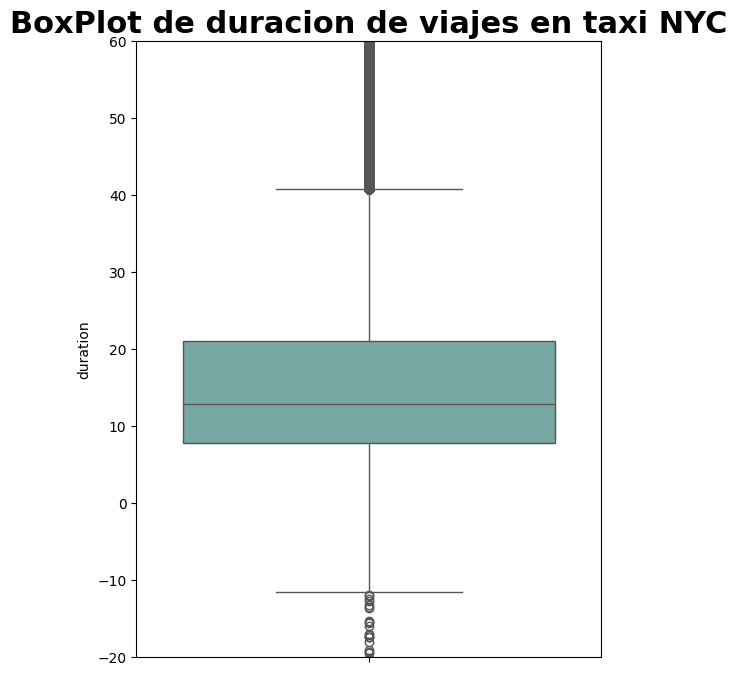

In [17]:
plt.figure(figsize=(6,8))
sns.boxplot(data=df_time, y='duration', saturation=0.3, color='turquoise')
plt.title('BoxPlot de duracion de viajes en taxi NYC', fontsize=22, fontweight='bold')
plt.ylim(-20, 60)

plt.show()

### Variables categoricas

Se tiene un total de 8 variables categoricas que se distribuyen de la siguiente manera segun la cantidad de categorias que las componen:
- __*VendorID*, *store_and_fwd_flag*, *type*, *trip_type*:__ 2 categorias
- __*RatecodeID*, *payment_type*:__ 6 categorias
- __*PULocationID*, *DOLocationID*:__ 265 categorias, una para cada zona de la ciudad. La info correspondiente a cada ID (categoria) se encuentra en el archivo taxi_zone_lookup.csv

C:\Users\Carolina\AppData\Local\Temp\ipykernel_33652\1656894365.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=taxis['RatecodeID'].value_counts().to_frame(), x='RatecodeID',y='count',palette='viridis', ax=ax[2,0])
C:\Users\Carolina\AppData\Local\Temp\ipykernel_33652\1656894365.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=taxis['payment_type'].value_counts().to_frame(), x='payment_type',y='count', palette='viridis', ax=ax[2,1])
C:\Users\Carolina\AppData\Local\Temp\ipykernel_33652\1656894365.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the sam

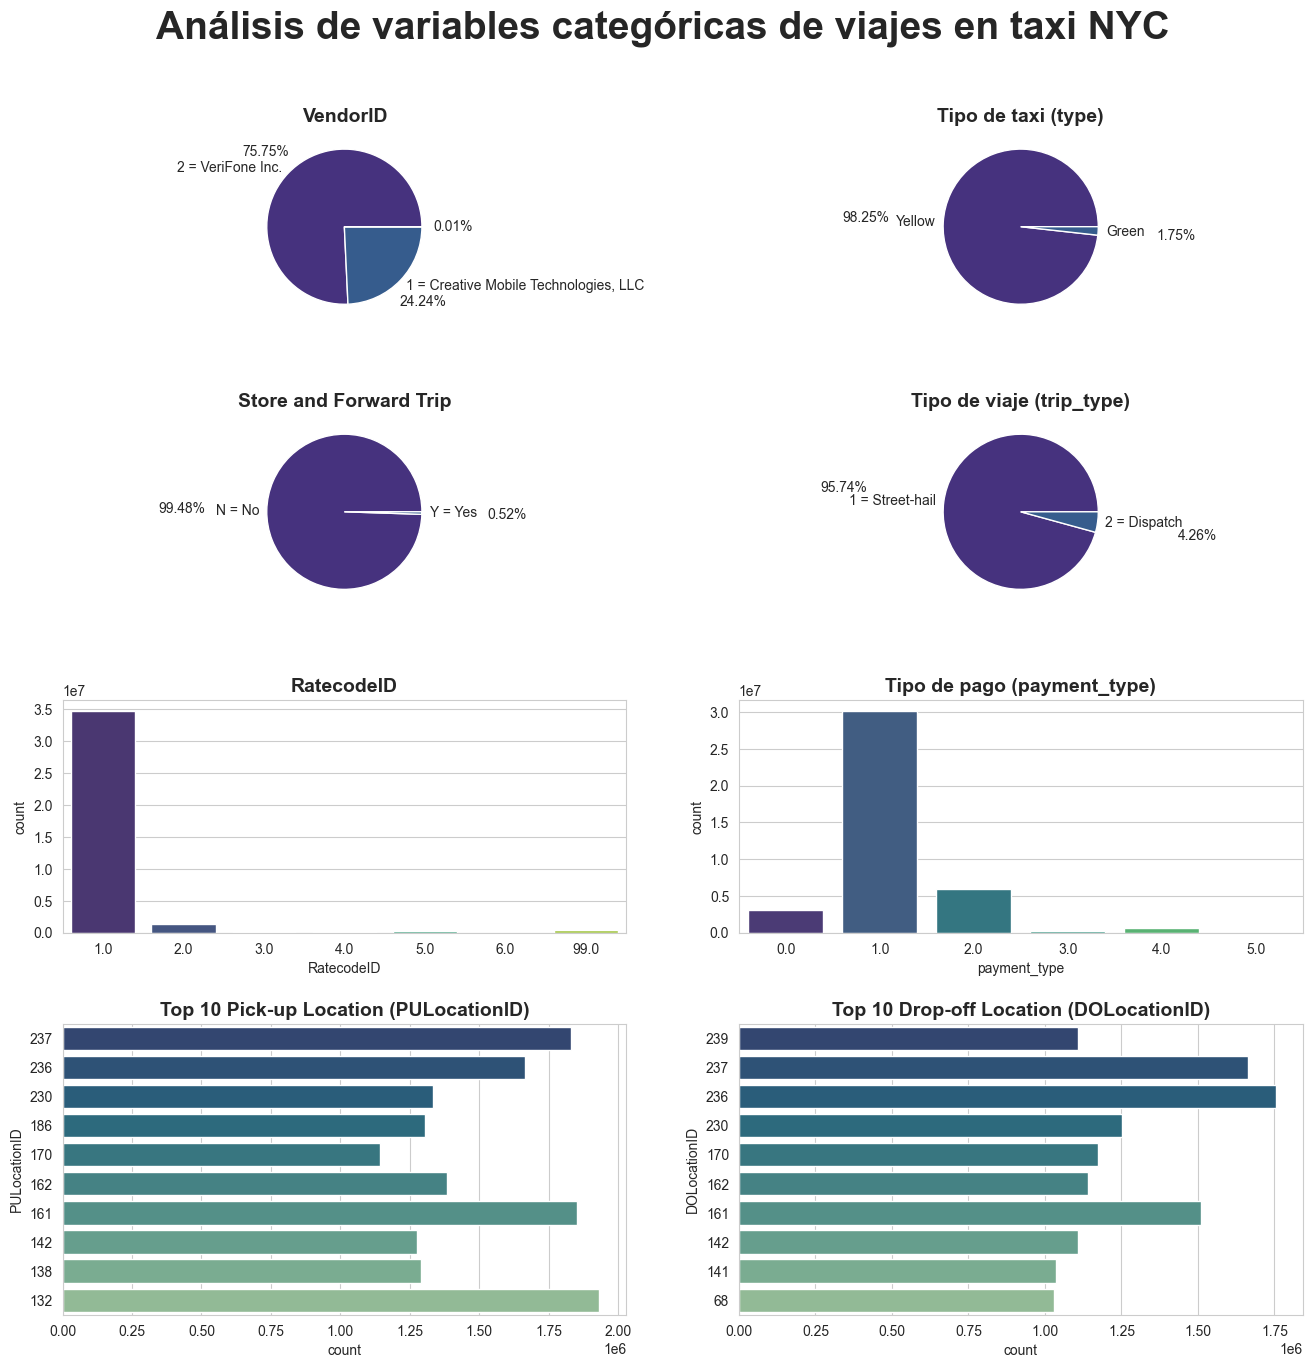

In [57]:
sns.set_palette("viridis")
sns.set_style("whitegrid")

fig, ax = plt.subplots(4,2, figsize = (16,15), gridspec_kw={'height_ratios': [1, 1, 1.2, 1.5]})
fig.suptitle("Análisis de variables categóricas de viajes en taxi NYC",fontsize=28, fontweight='bold')
plt.subplots_adjust(top=0.9,hspace=0.4)

ax[0,0].pie(taxis['VendorID'].value_counts(), labels=['2 = VeriFone Inc.', '1 = Creative Mobile Technologies, LLC', ''], autopct='%1.2f%%', pctdistance=1.4)
ax[0,0].set_title('VendorID',fontsize=14, fontweight='bold')

ax[1,0].pie(taxis['store_and_fwd_flag'].value_counts(), labels=['N = No', 'Y = Yes'], autopct='%1.2f%%', pctdistance=2.1)
ax[1,0].set_title('Store and Forward Trip',fontsize=14, fontweight='bold')

ax[0,1].pie(taxis['type'].value_counts(), labels=['Yellow', 'Green'], autopct='%1.2f%%', pctdistance=2)
ax[0,1].set_title('Tipo de taxi (type)',fontsize=14, fontweight='bold')

ax[1,1].pie(taxis['trip_type'].value_counts(), labels=['1 = Street-hail', '2 = Dispatch'], autopct='%1.2f%%', pctdistance=2.3)
ax[1,1].set_title('Tipo de viaje (trip_type)',fontsize=14, fontweight='bold')

sns.barplot(data=taxis['RatecodeID'].value_counts().to_frame(), x='RatecodeID',y='count',palette='viridis', ax=ax[2,0])
ax[2,0].set_title('RatecodeID',fontsize=14, fontweight='bold')

sns.barplot(data=taxis['payment_type'].value_counts().to_frame(), x='payment_type',y='count', palette='viridis', ax=ax[2,1])
ax[2,1].set_title('Tipo de pago (payment_type)',fontsize=14, fontweight='bold')

sns.barplot(data=taxis['PULocationID'].value_counts().head(10).sort_values(ascending=False).to_frame(), x='count',y='PULocationID', palette='crest', orient='h', ax=ax[3,0])
ax[3,0].invert_yaxis()
ax[3,0].set_title('Top 10 Pick-up Location (PULocationID)',fontsize=14, fontweight='bold')

sns.barplot(data=taxis['DOLocationID'].value_counts().head(10).sort_values(ascending=False).to_frame(), x='count',y='DOLocationID', palette='crest', orient='h', ax=ax[3,1])
ax[3,1].invert_yaxis()
ax[3,1].set_title('Top 10 Drop-off Location (DOLocationID)',fontsize=14, fontweight='bold')

plt.show()

Al realizar este analisis se encontro que para las siguientes columnas existian inconsistencias con respecto al diccionario de la base de datos proporcionada:
- __*VendorID*:__ Se tenia conocimiento de la existencia de 2 categorias ('1' y '2'), sin embargo se encontraron 3.475 registros pertenecientes a una tercera categoria '6'
- __*RatecodeID*:__ Se esperaba encontrar 6 categorias (del 1 al 6). Se encontraron 384.161 registros de categoria '99'
- __*payment_type*:__ Se esperaba que las 6 categorias se encontraran numeradas del 1 al 6, sin embargo se encontraron valores del 0 al 5.

Las columnas __*PULocationID*__ y __*DOLocationID*__ a pesar de no tener las 265 categorias esperadas (contaban con 263 y 262 categorias respectivamente) se verificó que los valores de estas estuvieran en el rango de 1 a 265. Para __*PULocationID*__ las categorias faltantes son las 103 y 104 y para __*PULocationID*__ las 103, 104 y 199.

In [98]:
taxis['PULocationID'].value_counts().index.to_series().describe()


count    263.000000
mean     133.224335
std       76.891561
min        1.000000
25%       66.500000
50%      134.000000
75%      199.500000
max      265.000000
Name: PULocationID, dtype: float64

In [99]:
taxis['DOLocationID'].value_counts().index.to_series().describe()

count    262.000000
mean     132.973282
std       76.930650
min        1.000000
25%       66.250000
50%      133.500000
75%      199.500000
max      265.000000
Name: DOLocationID, dtype: float64

In [62]:
print('Faltantes PULocationID:',set(range(1,266))-set(taxis['PULocationID'].value_counts().index))
print('Faltantes DOLocationID:',set(range(1,266))-set(taxis['DOLocationID'].value_counts().index))

Faltantes PULocationID: {104, 103}
Faltantes DOLocationID: {104, 199, 103}


### Variables cuantitativas

Se tiene un total de 11 variables cuantitativas todas de tipo 'float'. Se clasificaron segun la informacion que contienen:
- **Económicas:** *fare_amount*, *extra*, *mta_tax*, *tip_amount*, *tolls_amount*, *improvement_surcharge*, *total_amount*, *congestion_surcharge*, *Airport_fee*
- **Cantidades:** *passenger_count*
- **Distancias:** *trip_distance*

In [61]:
var_cuanti = taxis[['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee','passenger_count','trip_distance']]

In [71]:
var_cuanti.describe().iloc[1:,:]

,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,passenger_count,trip_distance
mean,19.350480,1.428467,0.483601,3.361928,0.570585,0.97053,28.008637,2.219205,0.149981,1.34896,4.730959
std,67.913959,2.411811,0.131694,4.138530,2.235709,0.23167,69.487506,0.874533,0.503131,0.85263,343.024102
min,-2261.200000,-39.170000,-0.500000,-330.880000,-117.260000,-1.00000,-2265.450000,-2.750000,-1.750000,0.00000,0.000000
25%,9.300000,0.000000,0.500000,0.000000,0.000000,1.00000,15.750000,2.500000,0.000000,1.00000,1.010000
50%,13.500000,1.000000,0.500000,2.660000,0.000000,1.00000,21.000000,2.500000,0.000000,1.00000,1.750000
75%,22.580000,2.500000,0.500000,4.280000,0.000000,1.00000,30.600000,2.500000,0.000000,1.00000,3.340000
max,334076.320000,10002.500000,52.090000,4174.000000,1702.880000,1.00000,334145.300000,2.750000,1.750000,9.00000,327025.190000


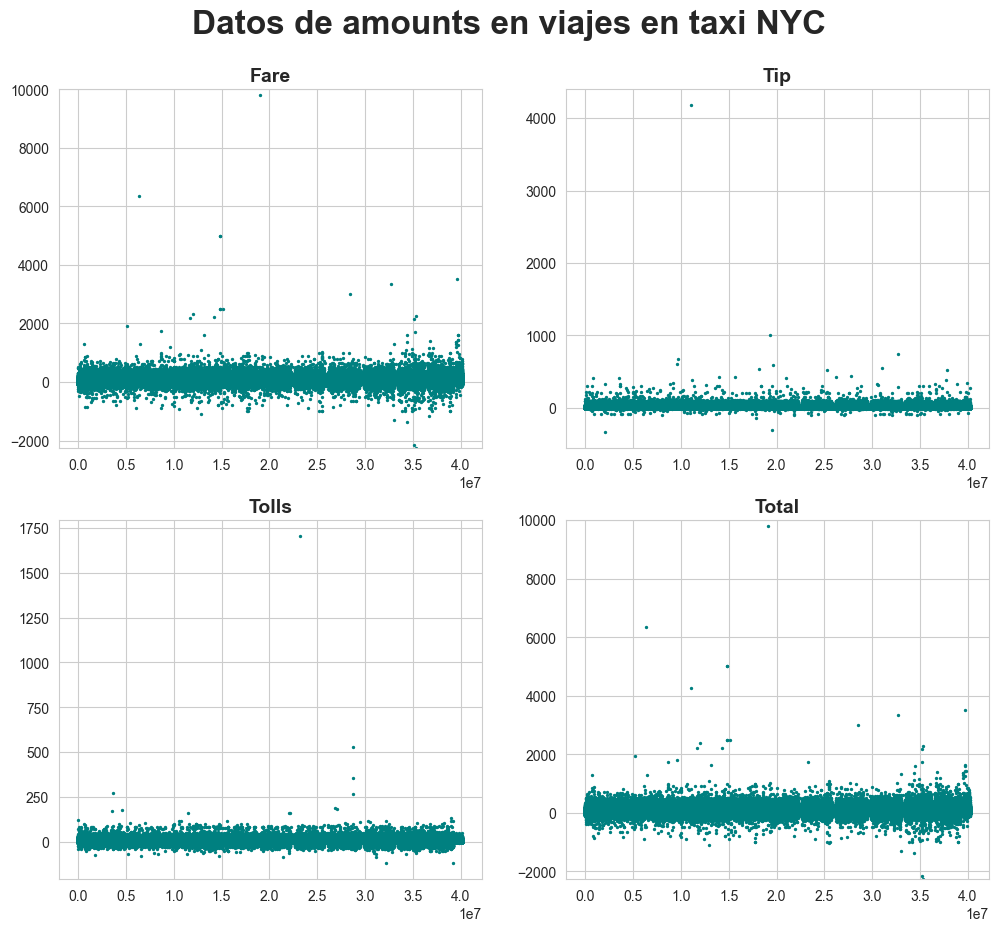

In [59]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(2,2, figsize = (12,10), gridspec_kw={'height_ratios': [1, 1]})
fig.suptitle("Datos de amounts en viajes en taxi NYC",fontsize=24, fontweight='bold')
plt.subplots_adjust(top=0.9,hspace=0.2)

ax[0,0].plot(var_cuanti['fare_amount'],'o',markersize=1.4,color='teal')
ax[0,0].set_ylim(var_cuanti['fare_amount'].min(),10000)
ax[0,0].set_title('Fare',fontsize=14, fontweight='bold')

ax[0,1].plot(var_cuanti['tip_amount'],'o',markersize=1.4,color='teal')
ax[0,1].set_title('Tip',fontsize=14, fontweight='bold')

ax[1,0].plot(var_cuanti['tolls_amount'],'o',markersize=1.4,color='teal')
ax[1,0].set_title('Tolls',fontsize=14, fontweight='bold')

ax[1,1].plot(var_cuanti['total_amount'],'o',markersize=1.4,color='teal')
ax[1,1].set_ylim(var_cuanti['total_amount'].min(),10000)
ax[1,1].set_title('Total',fontsize=14, fontweight='bold')

plt.show()

Los datos de los diferentes *amount* se concentran en valores bajos (por debajo de los 30 USD). Sin embargo, los valores que se alejan de este rango son suficientes para que se pueda observar un rango que aparenta ser mas amplio aunque estos valores no superen el 10-15% de los datos. Tambien es posible observar que exsten unos valores extermos que incluso se alejan completamente de estos. Por otra parte, se tiene que existen valores negativos para todas las variables lo cual no es consistente con el valor que representan (tarifas)

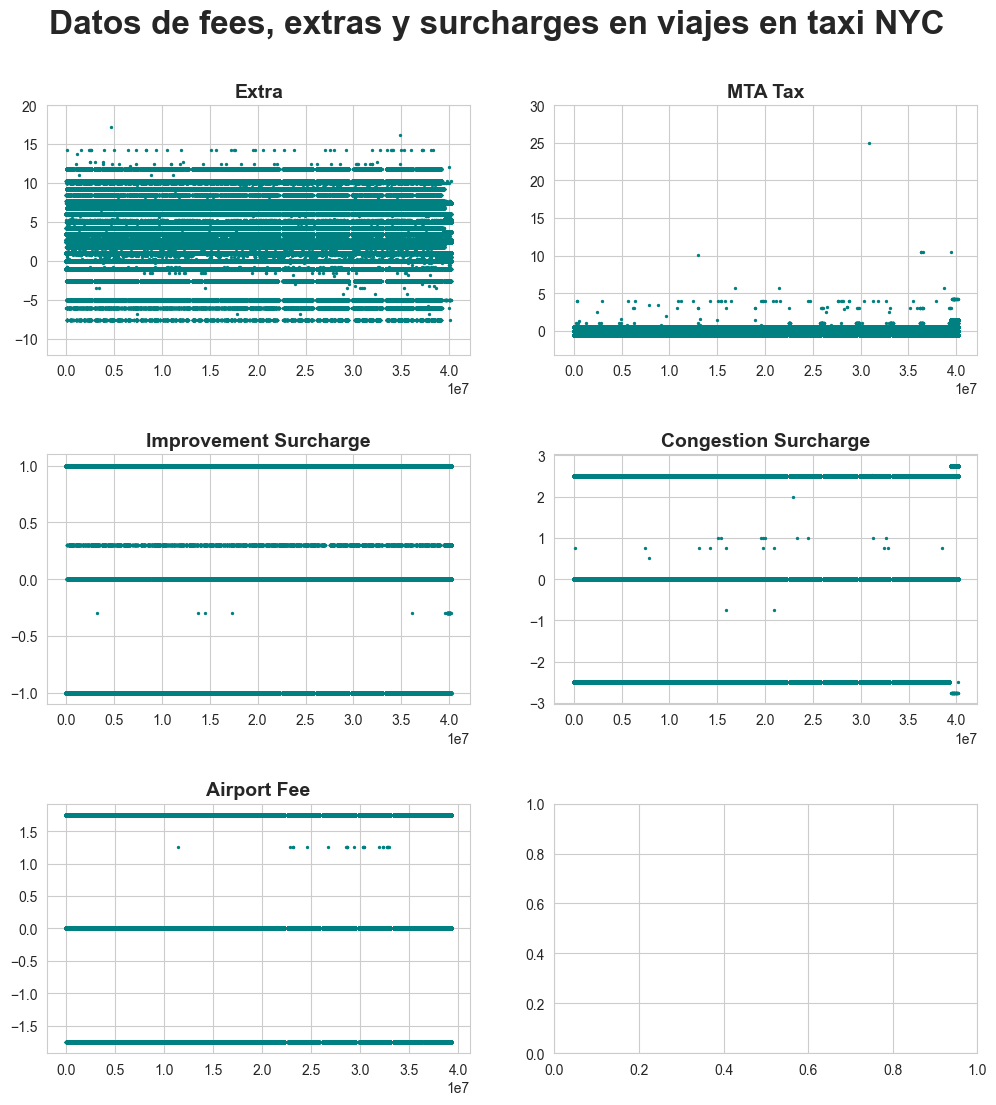

In [ ]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(3,2, figsize = (12,12))
fig.suptitle("Datos de fees, extras y surcharges en viajes en taxi NYC",fontsize=24, fontweight='bold')
plt.subplots_adjust(top=0.9,hspace=0.4)

ax[0,0].plot(var_cuanti['extra'],'o',markersize=1.4,color='teal')
ax[0,0].set_ylim(-12,20)
ax[0,0].set_title('Extra',fontsize=14, fontweight='bold')

ax[0,1].plot(var_cuanti['mta_tax'],'o',markersize=1.4,color='teal')
ax[0,1].set_ylim(top=30)
ax[0,1].set_title('MTA Tax',fontsize=14, fontweight='bold')

ax[1,0].plot(var_cuanti['improvement_surcharge'],'o',markersize=1.4,color='teal')
ax[1,0].set_title('Improvement Surcharge',fontsize=14, fontweight='bold')

ax[1,1].plot(var_cuanti['congestion_surcharge'],'o',markersize=1.4,color='teal')
ax[1,1].set_title('Congestion Surcharge',fontsize=14, fontweight='bold')

ax[2,0].plot(var_cuanti['Airport_fee'],'o',markersize=1.4,color='teal')
ax[2,0].set_title('Airport Fee',fontsize=14, fontweight='bold')

plt.show()

Es posible observar que las variables *improvement_surcharge*, *congestion_surcharge* y *Airport_fee* Se encuentran concentradas entre 3 o 4 valores especificos. Por otro lado, se tiene que la variable *mta_tax*  tienen un comportamiento similar al de las variables *amount* antes mencionadas. Por su parte la variable *extra* que tiene un comportamiento un poco intermedio ya que se encuentra encamarcado en un conjunto y rango pequeño de valores sin llegaran a ser un tan definidos como las de *surcharges*.

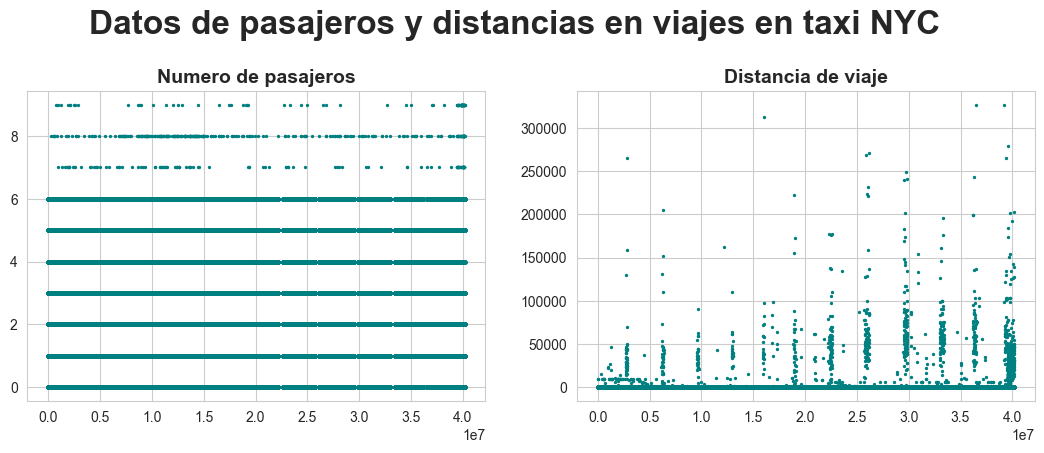

In [ ]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(1,2, figsize = (13,4.5))
fig.suptitle("Datos de pasajeros y distancias en viajes en taxi NYC",fontsize=24, fontweight='bold')
plt.subplots_adjust(top=0.8)

ax[0].plot(var_cuanti['passenger_count'],'o',markersize=1.4,color='teal')
ax[0].set_title('Numero de pasajeros',fontsize=14, fontweight='bold')

ax[1].plot(var_cuanti['trip_distance'],'o',markersize=1.4,color='teal')
ax[1].set_title('Distancia de viaje',fontsize=14, fontweight='bold')

plt.show()

Se tienen dos comportamientos diferentes entre las variables *passenger_count* y *trip_distance*. La variable de numero de pasajeros tienen un comportamiento orientados a ciertos valores definidos, consistente con su caracteristica de ser una variable discreta. Por su parte, la distancia de viaje esta compuenta de valores en un rango amplio y un comportamiento con el de las variables *amount*.

#### Histogramas

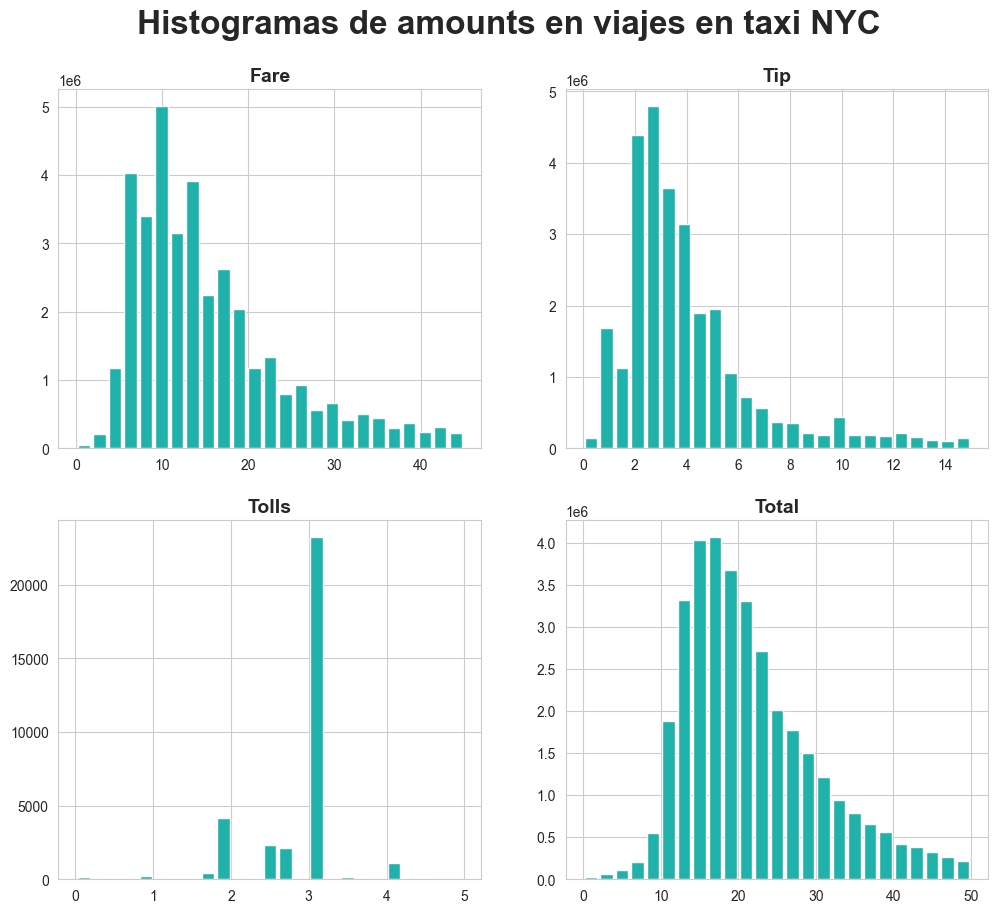

In [120]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(2,2, figsize = (12,10), gridspec_kw={'height_ratios': [1, 1]})
fig.suptitle("Histogramas de amounts en viajes en taxi NYC",fontsize=24, fontweight='bold')
plt.subplots_adjust(top=0.9,hspace=0.2)

ax[0,0].hist(var_cuanti[(var_cuanti['fare_amount']>0)&(var_cuanti['fare_amount']<45)]['fare_amount'], bins=25, rwidth=0.8, color='lightseagreen')
ax[0,0].set_title('Fare',fontsize=14, fontweight='bold')

ax[0,1].hist(var_cuanti[(var_cuanti['tip_amount']>0)&(var_cuanti['tip_amount']<15)]['tip_amount'], bins=25, rwidth=0.8, color='lightseagreen')
ax[0,1].set_title('Tip',fontsize=14, fontweight='bold')

ax[1,0].hist(var_cuanti[(var_cuanti['tolls_amount']>0)&(var_cuanti['tolls_amount']<5)]['tolls_amount'], bins=25, rwidth=0.8, color='lightseagreen')
ax[1,0].set_title('Tolls',fontsize=14, fontweight='bold')

ax[1,1].hist(var_cuanti[(var_cuanti['total_amount']>0)&(var_cuanti['total_amount']<50)]['total_amount'], bins=25, rwidth=0.8, color='lightseagreen')
ax[1,1].set_title('Total',fontsize=14, fontweight='bold')

plt.show()

Las variables *fare_amount*, *tip_amount*, y *total_amount* presentan una distribucion normal sesgada a la derecha aunque para el ultimo caso tiene una tendencia un poco mas simetrica. Por el contrario, *tolls_amount* no presenta ningun tipo de distribucion ni tendencia.

C:\Users\Carolina\AppData\Local\Temp\ipykernel_7468\1739262260.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=var_cuanti['improvement_surcharge'].value_counts().to_frame(), x='improvement_surcharge',y='count',palette='viridis', ax = ax[1,0])
C:\Users\Carolina\AppData\Local\Temp\ipykernel_7468\1739262260.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=var_cuanti['congestion_surcharge'].value_counts().to_frame(), x='congestion_surcharge',y='count',palette='viridis', ax = ax[1,1])
C:\Users\Carolina\AppData\Local\Temp\ipykernel_7468\1739262260.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` vari

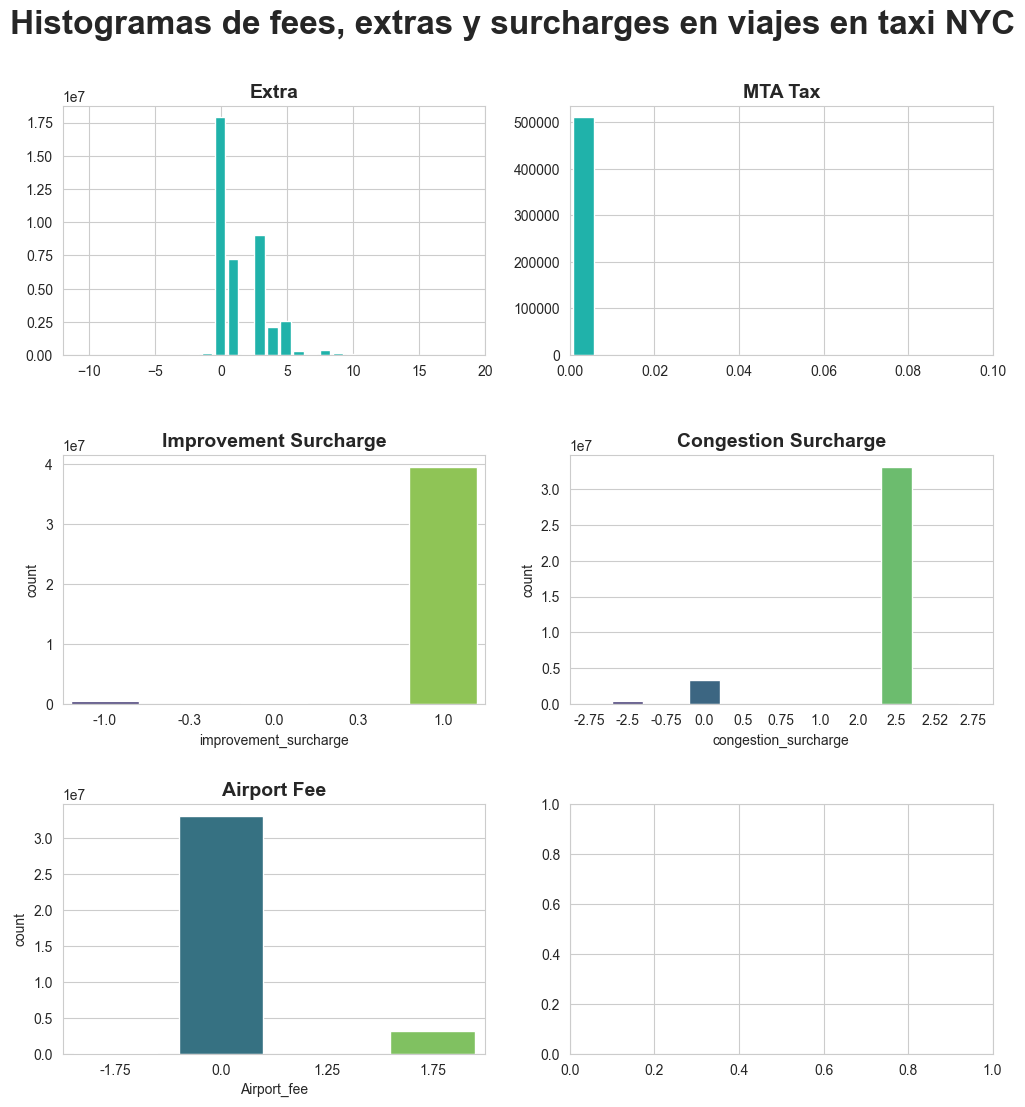

In [112]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(3,2, figsize = (12,12))
fig.suptitle("Histogramas de fees, extras y surcharges en viajes en taxi NYC",fontsize=24, fontweight='bold')
plt.subplots_adjust(top=0.9,hspace=0.4)

ax[0,0].hist(var_cuanti[(var_cuanti['extra']>-12)&(var_cuanti['extra']<20)]['extra'], bins=25, rwidth=0.8, color='lightseagreen')
ax[0,0].set_xlim(-12,20)
ax[0,0].set_title('Extra',fontsize=14, fontweight='bold')

ax[0,1].hist(var_cuanti[(var_cuanti['mta_tax']>-0.01)&(var_cuanti['mta_tax']<0.5)]['mta_tax'], bins=25, rwidth=0.8, color='lightseagreen')
ax[0,1].set_xlim(0,0.1)
ax[0,1].set_title('MTA Tax',fontsize=14, fontweight='bold')

sns.barplot(data=var_cuanti['improvement_surcharge'].value_counts().to_frame(), x='improvement_surcharge',y='count',palette='viridis', ax = ax[1,0])
ax[1,0].set_title('Improvement Surcharge',fontsize=14, fontweight='bold')

sns.barplot(data=var_cuanti['congestion_surcharge'].value_counts().to_frame(), x='congestion_surcharge',y='count',palette='viridis', ax = ax[1,1])
ax[1,1].set_title('Congestion Surcharge',fontsize=14, fontweight='bold')

sns.barplot(data=var_cuanti['Airport_fee'].value_counts().to_frame(), x='Airport_fee',y='count',palette='viridis', ax = ax[2,0])
ax[2,0].set_title('Airport Fee',fontsize=14, fontweight='bold')

plt.show()

Ninguna de las variables presenta una distribucion ni tendencia marcada. En el caso de *improvement_surcharge*, *congestion_surcharge* y *Airport_fee* datos se concentran en unos pocos valores, con 1 mucho mas marcado de que los demas. En el caso de *mta_tax* se encontro que los valores se concentran en valores muy cercanos a cero. Por otra parte, en para la variable *extra* se presenta un poco de distribucion normal simetrica, aunque no es una tendencia muy marcada.

C:\Users\Carolina\AppData\Local\Temp\ipykernel_7468\3049852879.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=var_cuanti['passenger_count'].value_counts().to_frame(), x='passenger_count',y='count',palette='viridis', ax = ax[0])


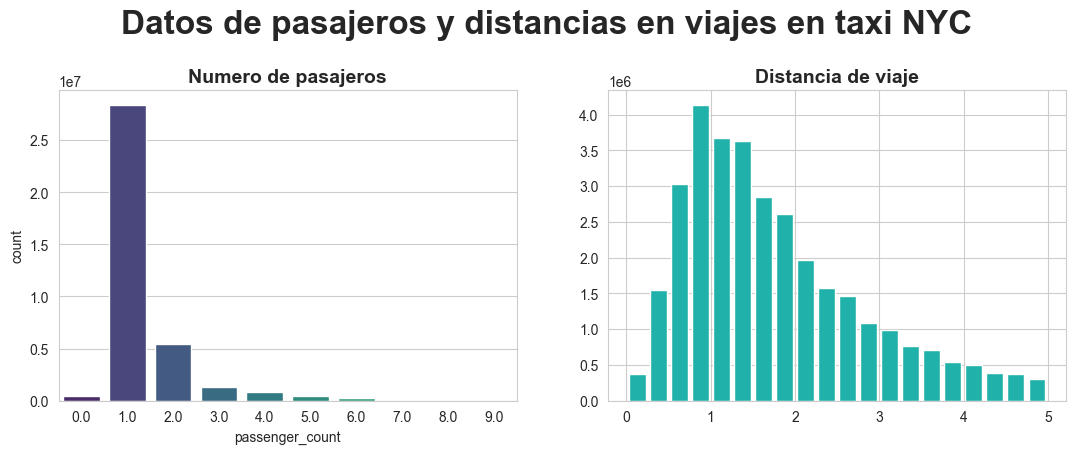

In [ ]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(1,2, figsize = (13,4.5))
fig.suptitle("Datos de pasajeros y distancias en viajes en taxi NYC",fontsize=24, fontweight='bold')
plt.subplots_adjust(top=0.8)

sns.barplot(data=var_cuanti['passenger_count'].value_counts().to_frame(), x='passenger_count',y='count',palette='viridis', ax = ax[0])
ax[0].set_title('Numero de pasajeros',fontsize=14, fontweight='bold')

ax[1].hist(var_cuanti[(var_cuanti['trip_distance']>0)&(var_cuanti['trip_distance']<5)]['trip_distance'], bins=20, rwidth=0.8, color='lightseagreen')
ax[1].set_title('Distancia de viaje',fontsize=14, fontweight='bold')

plt.show()

Para el caso de *passenger_count* se tiene que la variable es discreta, toma solo valores de 0 a 9 y con una tendencia muy marcada hacia en el numero 1. Por otra parte, la variable *trip_distance* tiene un distribucion normal sesgada asimetrica sesgada a la derecha.

## Analisis de Outliers

Se realizó el análisis de Outliers para las variables cauntitativas. Teniendo en cuenta los graficos anteriores se decidio abordar este analisis de dos maneras diferentes. Para las variables con "valores definidos" (*passenger_count*, *improvement_surcharge*, *congestion_surcharge* y *Airport_fee*) se tomo como outlier aquellos valores para los cuales existiera un numero de registros menores al 1% del total. Para las demas variables (*fare_amount*, *tip_amount*, *tolls_amount*, *total_amount*, *extra*, *mta_tax* y *trip_distance*) se llevo a cabo un analisis de outliers haciendo uso de un grafico de BoxPlot. 

### Variables de valores definidos

Teniendo en cuenta el criterio del 1% mencionado anteriormente (401.767 registros minimo), se tendria que los siguientes serian los Outliers para estas variables.

| Variable | Valores Outliers | Cantidad de Outliers | Porcentaje de Outliers |
| -------- | ---------------- | -------------------- | ---------------------- |
| passenger_count | 6, 7, 8, 9 | 267.174 | 0.66% |
| improvement_surcharge | -0.3, 0.0, 0.3 | 178.060 | 0.44% |
| congestion_surcharge | 2.75, -2.75, 0.75, 1.00, -0.75, 0.50, 2.52, 2.00 | 188.053 | 0.47% |
| Airport_fee | -1.75, 1.25 | 178.179 | 0.44% |

In [68]:
var_cuanti['passenger_count'].value_counts()

passenger_count
1.0    28370681
2.0     5431223
3.0     1296346
4.0      793498
0.0      452655
5.0      407395
6.0      266687
8.0         294
7.0         110
9.0          83
Name: count, dtype: int64

In [70]:
var_cuanti['improvement_surcharge'].value_counts()

improvement_surcharge
 1.0    39493642
-1.0      505069
 0.0      164020
 0.3       14000
-0.3          40
Name: count, dtype: int64

In [71]:
var_cuanti['congestion_surcharge'].value_counts()

congestion_surcharge
 2.50    33063489
 0.00     3358258
-2.50      409172
 2.75      187994
-2.75          35
 0.75          10
 1.00           9
-0.75           2
 0.50           1
 2.52           1
 2.00           1
Name: count, dtype: int64

In [72]:
var_cuanti['Airport_fee'].value_counts()

Airport_fee
 0.00    33080187
 1.75     3193629
-1.75       78156
 1.25          23
Name: count, dtype: int64

### Boxplot

In [136]:
def outliers (col):
    '''
    Funcion que imprime los valores minimo, maximo, cantidad de outliers y su porcentaje en formato de tabla
        Parametros:
            col (str): Nombre de la columna
    '''
    Q3 = float(var_cuanti[col].quantile(0.75))
    Q1 = float(var_cuanti[col].quantile(0.25))
    RIC = Q3 - Q1

    Min = Q1 - 1.5*RIC
    Max = Q3 + 1.5*RIC

    out = var_cuanti[(var_cuanti[col]<Min)|(var_cuanti[col]>Max)]

    print(f'| {col} | {Min} | {Max} | {out.shape[0]} | {(out.shape[0]/taxis.shape[0])*100} % |')

In [ ]:
for i in var_cuanti.columns:
    outliers(i)

A partir de los analisis empleando los BoxPlot se obtuvo los limites que determinan los outliers por este metodo y la cantidad de Outliers. Llama la atencion que para las variables *tolls_amount* y *mta_tax* los rangos de valores son nulos, se consideria un unico valor como valido.

| Variable | Minimo | Maximo | Cantidad de Outliers | Porcentaje de Outliers |
| -------- | ------ | ------ | -------------------- | ---------------------- |
| fare_amount | -10.62 | 42.50 | 4.062.206 | 10.11% |
| tip_amount | -6.42 | 10.7 | 2.338.676 | 5.82% |
| tolls_amount | 0.0 | 0.0 | 3.095.918 | 7.70% |
| total_amount | -6.52 | 52.88 | 4.887.108 | 12.16% |
| extra | -3.75 | 6.25 | 698.484 | 1.74% |
| mta_tax | 0.5 | 0.5 | 1.081.957 | 2.69% |
| trip_distance | -2.48 | 6.84 | 5.154.570 | 12.83% |

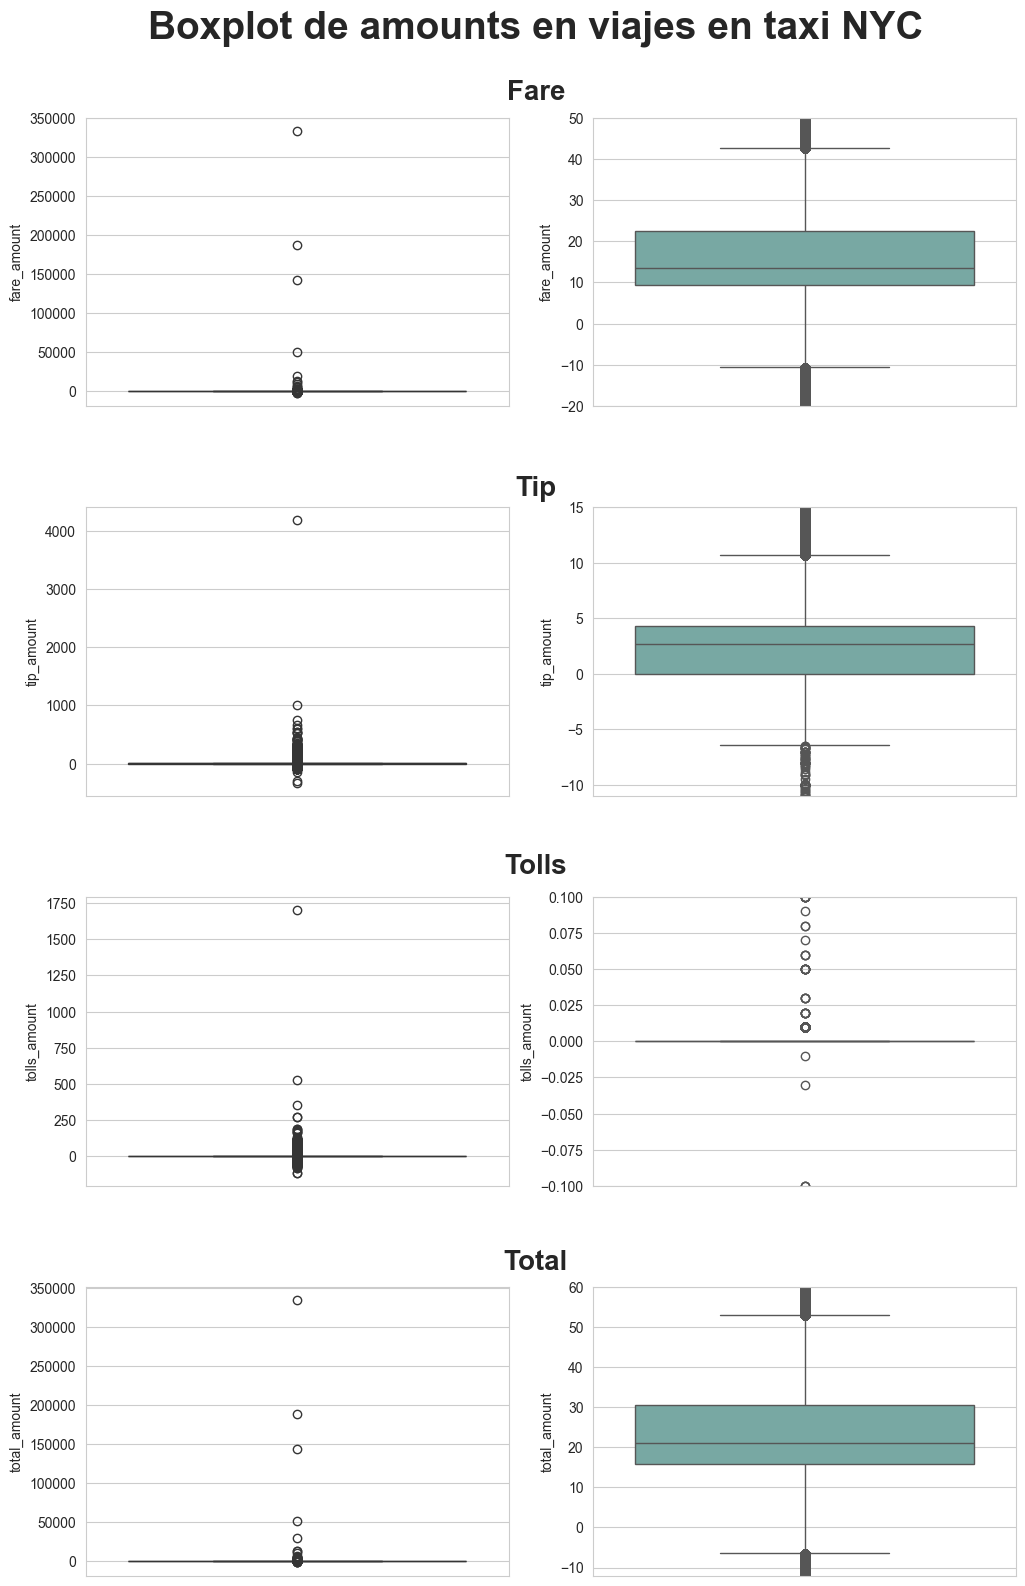

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(12, 18))
fig.suptitle('Boxplot de amounts en viajes en taxi NYC', fontsize=28, fontweight='bold')
plt.subplots_adjust(top = 0.92, hspace=0.35)

fig.text(0.5, 0.93, 'Fare', ha='center', fontsize=20, fontweight='bold')
fig.text(0.5, 0.71, 'Tip', ha='center', fontsize=20, fontweight='bold')
fig.text(0.5, 0.50, 'Tolls', ha='center', fontsize=20, fontweight='bold')
fig.text(0.5, 0.28, 'Total', ha='center', fontsize=20, fontweight='bold')


sns.boxplot(data=var_cuanti, y='fare_amount', ax = ax[0,0])
sns.boxplot(data=var_cuanti, y='fare_amount', saturation=0.3, color='turquoise', ax = ax[0,1])
ax[0,1].set_ylim(-20, 50)

sns.boxplot(data=var_cuanti, y='tip_amount', ax = ax[1,0])
sns.boxplot(data=var_cuanti, y='tip_amount', saturation=0.3, color='turquoise', ax = ax[1,1])
ax[1,1].set_ylim(-11, 15)

sns.boxplot(data=var_cuanti, y='tolls_amount', ax = ax[2,0])
sns.boxplot(data=var_cuanti, y='tolls_amount', saturation=0.3, color='turquoise', ax = ax[2,1])
ax[2,1].set_ylim(-0.1, 0.1)

sns.boxplot(data=var_cuanti, y='total_amount', ax = ax[3,0])
sns.boxplot(data=var_cuanti, y='total_amount', saturation=0.3, color='turquoise', ax = ax[3,1])
ax[3,1].set_ylim(-12, 60)

plt.show()

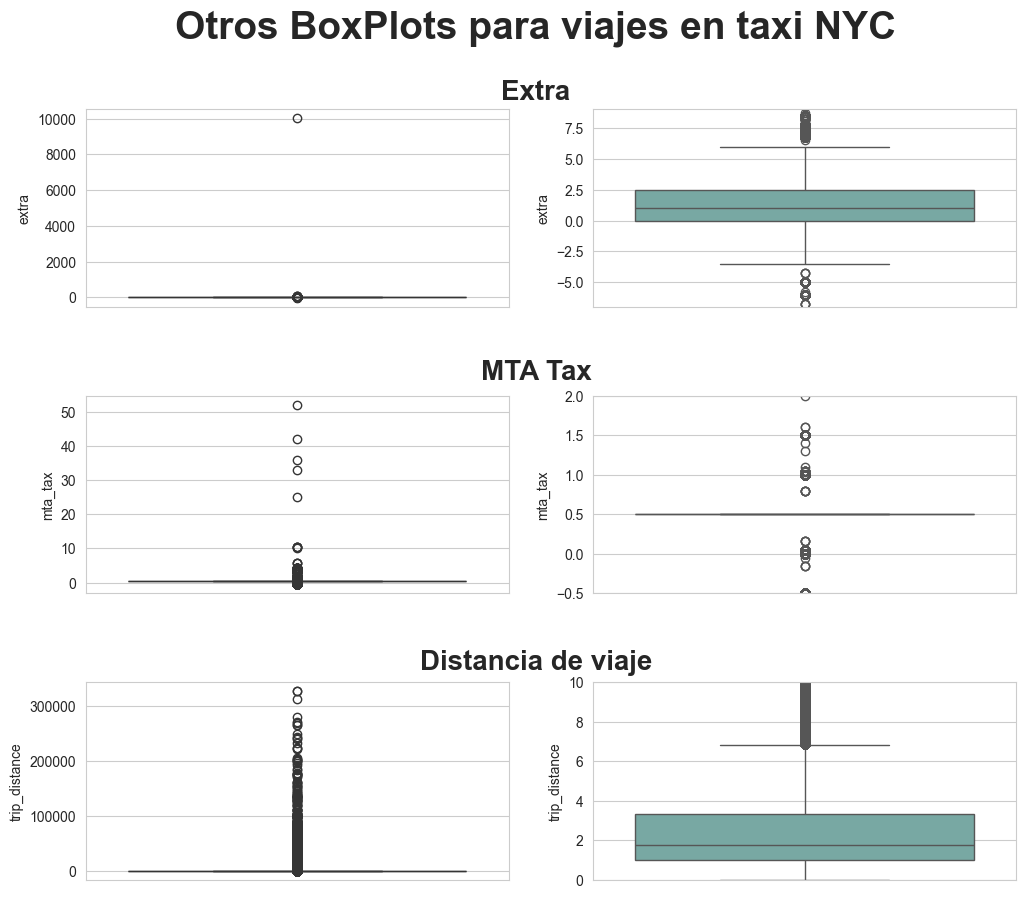

In [96]:
fig, ax = plt.subplots(3, 2, figsize=(12, 10))
fig.suptitle('Otros BoxPlots para viajes en taxi NYC', fontsize=28, fontweight='bold')
plt.subplots_adjust(top = 0.88, hspace=0.45)

fig.text(0.5, 0.89, 'Extra', ha='center', fontsize=20, fontweight='bold')
fig.text(0.5, 0.61, 'MTA Tax', ha='center', fontsize=20, fontweight='bold')
fig.text(0.5, 0.32, 'Distancia de viaje', ha='center', fontsize=20, fontweight='bold')

sns.boxplot(data=var_cuanti, y='extra', ax = ax[0,0])
sns.boxplot(data=var_cuanti, y='extra', saturation=0.3, color='turquoise', ax = ax[0,1])
ax[0,1].set_ylim(-7, 9)

sns.boxplot(data=var_cuanti, y='mta_tax', ax = ax[1,0])
sns.boxplot(data=var_cuanti, y='mta_tax', saturation=0.3, color='turquoise', ax = ax[1,1])
ax[1,1].set_ylim(-0.5, 2)

sns.boxplot(data=var_cuanti, y='trip_distance', ax = ax[2,0])
sns.boxplot(data=var_cuanti, y='trip_distance', saturation=0.3, color='turquoise', ax = ax[2,1])
ax[2,1].set_ylim(0,10)

plt.show()

Adicionalmente, se calculo la cantidad de Outliers si se considera que ninguno de los valores deberia poder ser negativo (menor que cero) de lo cual se obtuvo el siguiente resultado.

| Variable | Cantidad de Outliers | Porcentaje de Outliers |
| -------- | -------------------- | ---------------------- |
| fare_amount |  581.132  |  1.45 % |
| extra |  252.460  |  0.63 % |
| mta_tax |  487.695  |  1.21 % |
| tip_amount |  1.393  |  0.0034 % |
| tolls_amount |  37.715  |  0.09 % |
| improvement_surcharge |  505.109  |  1.26 % |
| total_amount |  505.841  |  1.26 % |
| congestion_surcharge |  409.209  |  1.02 % |
| Airport_fee |  78.156  |  0.19 % |
| passenger_count |  0  |  0.0 % |
| trip_distance |  0  |  0.0 % |

In [ ]:
def outliers_neg (col):
    '''
    Funcion que imprime la cantidad de outliers y su porcentaje en formato de tabla
        Parametros:
            col (str): Nombre de la columna
    '''
    out = var_cuanti[var_cuanti[col]<0]
    print(f'| {col} | ', out.shape[0], ' | ', (out.shape[0]/taxis.shape[0])*100, '% |')

for i in var_cuanti.columns:
    outliers_neg(i)

## Analisis de Correlacion

Se llevo a cabo un analisis de correlacion de las variables. Teniendo en cuenta que las columnas *type* y *store_and_fwd_flag* corresponden a valores categoricos se decidio realizar la trasformacion a numeros de la siguiente manera para poder incluirlos:
- __*type*:__ 1 para 'yellow' y 2 para 'green'
- __*store_and_fwd_flag*:__ 0 para 'N' (No) y 1 para 'Y' (Si)

De acuerdo con esto, se emplearon un total de 19 campos para la elaboracion de la matriz. Solo fueron excluidos los campos de 'datetime' (*tpep_pickup_datetime* y *tpep_dropoff_datetime*) que se pretende incluir en un analisis posterior y *ehail_fee* que tiene sus valores en nulo y se pretende eliminar durante el proceso de ETL.

In [12]:
df_corr = taxis.drop(columns=['tpep_pickup_datetime','tpep_dropoff_datetime','ehail_fee'])

In [ ]:
df_corr['type'] = df_corr['type'].apply(lambda x : 1 if x=='yellow' else 2)
df_corr['store_and_fwd_flag'] = df_corr['store_and_fwd_flag'].apply(lambda x : 1 if x=='Y' else 0)

In [54]:
correlacion=df_corr.corr()

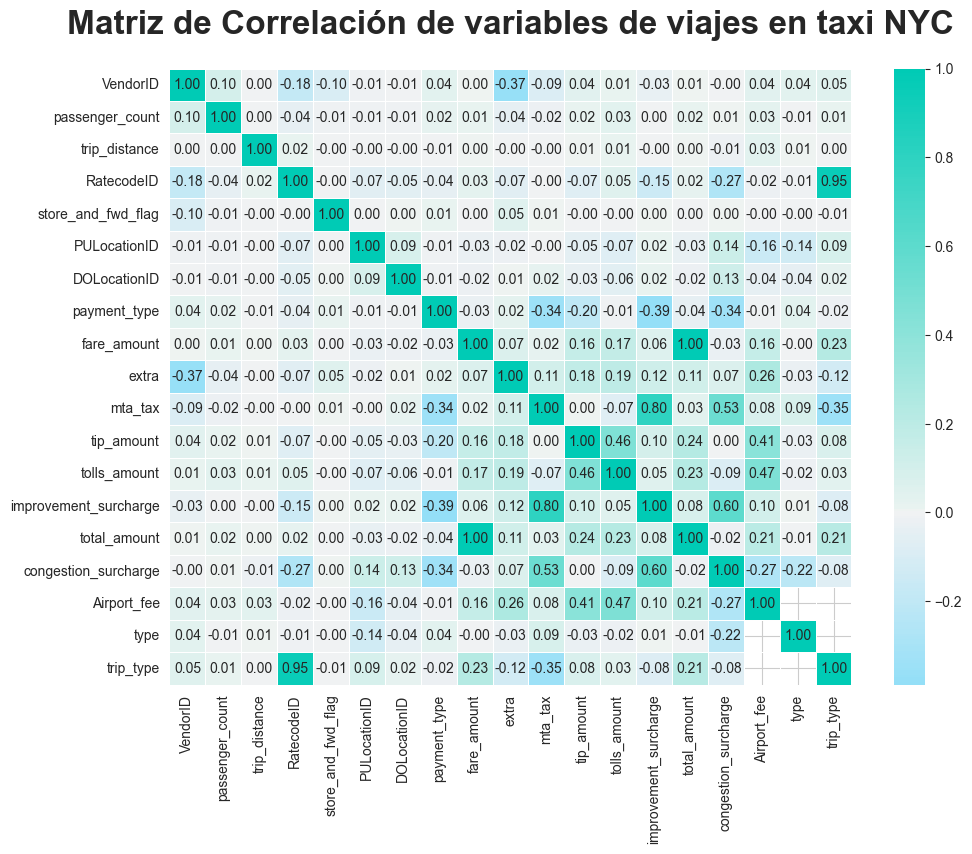

In [58]:
plt.figure(figsize=(11, 8))

sns.heatmap(correlacion, annot=True,fmt="0.2f", linewidths=0.5, cmap=sns.diverging_palette(230, 180, s=160, l=70, center="light", as_cmap=True), center=0)
plt.title('Matriz de Correlación de variables de viajes en taxi NYC', fontsize=24, fontweight='bold', pad=25)
plt.show()

A partir de la informacion obtenida se idedntificaron las siguientes correlaciones entre variables. Estas fueron categorizadas en fuerte (3), moderada (4) y leve (34). Los pares de variables que no se mencionan a continuacion se considera no presentan ninguna correlacion.
- **Fuerte (| r | > 0.7):** 
    - RatecodeID - trip_type (0.95)
    - fare_amount - total_amount (1)
    - mta_tax - improvement_surcharge (0.8)

- **Moderada (0.4 <= | r| <= 0.7):** 
    - mta_tax - congestion_surcharge (0.53)
    - tip_amount - tolls_amount (0.46)
    - tip_amount - Airport_fee (0.41)
    - tolls_amount - Airport_fee (0.47)

- **Leve (0.1 <= | r | < 0.4):**
    - VendorID - RatecodeID **(-0.18)**
    - VendorID - passenger_count (0.10)
    - VendorID - store_and_fwd_flag **(-0.10)**
    - VendorID - extra **(-0.37)**
    - RatecodeID - improvement_surcharge **(-0.15)**
    - RatecodeID - congestion_surcharge **(-0.27)**
    - PULocationID - congestion_surcharge (0.14)
    - PULocationID - Airport_fee **(-0.16)**
    - PULocationID - type **(-0.14)**
    - DOLocationID - congestion_surcharge (0.13)
    - payment_type - mta_tax **(-0.34)**
    - payment_type - tip_amount **(-0.20)**
    - payment_type - improvement_surcharge **(-0.39)**
    - payment_type - congestion_surcharge **(-0.34)**
    - fare_amount - tip_amount (0.16)
    - fare_amount - tolls_amount (0.17)
    - fare_amount - Airport_fee (0.16)
    - fare_amount - trip_type (0.23)
    - extra - mta_tax (0.11)
    - extra - tip_amount (0.18)
    - extra - tolls_amount (0.19)
    - extra - improvement_surcharge (0.12)
    - extra - total_amount (0.11)
    - extra - Airport_fee (0.26)
    - extra - trip_type **(-0.12)**
    - mta_tax - trip_type **(-0.35)**
    - tip_amount - improvement_surcharge (0.10)
    - tip_amount - total_amount (0.24)
    - tolls_amount - total_amount (0.23)
    - improvement_surcharge - Airport_fee (0.10)
    - total_amount - Airport_fee (0.21)
    - total_amount - trip_type (0.21)
    - congestion_surcharge - Airport_fee **(-0.27)**
    - congestion_surcharge - type **(-0.22)**

Al finalizar se puede concluir que la mayoria de las variables no tiene una correlacion entre si y existen pocas con correlaciones fuertes o moderadas. Asimismo, se tiene que todas las correlaciones negativas son leves. Se  puede observar tambien que las correlaciones se presentan principalmente entre las variables economicas. Las variables de lugar de descenso y recogida de pasajeros tiene leve relacion con cargos por congestion, tarifa de aeropuerto y tipo de taxi, estas ultimas ligadas a la ubicacion geografica.